In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

%matplotlib inline

In [2]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

trainX = trainX / 255.0
testX = testX / 255.0

trainY = to_categorical(trainY)
testY = to_categorical(testY)

print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


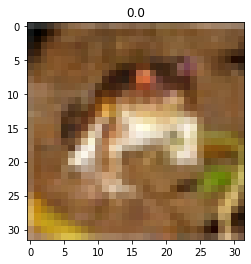

In [29]:
plt.imshow(trainX[0])

In [9]:
labels = "airplane automobile bird cat deer dog frog horse ship truck".split()
print(labels)
print(labels[np.argmax(trainY[0])])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
frog


In [10]:
model = Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(trainX, trainY, batch_size=64, epochs=5)

Epoch 1/5
782/782 [==============================] - 107s 137ms/step - loss: 1.1523 - accuracy: 0.5927
Epoch 2/5
782/782 [==============================] - 106s 135ms/step - loss: 0.9074 - accuracy: 0.6820
Epoch 3/5
782/782 [==============================] - 108s 139ms/step - loss: 0.7719 - accuracy: 0.7319
Epoch 4/5
782/782 [==============================] - 105s 134ms/step - loss: 0.6857 - accuracy: 0.7600
Epoch 5/5
782/782 [==============================] - 105s 134ms/step - loss: 0.6093 - accuracy: 0.7855


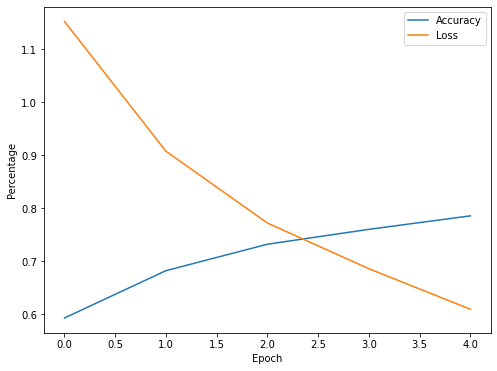

In [78]:
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["loss"], label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Percentage")
plt.legend()

In [76]:
model.save('models/74_percent_model')

313/313 [==============================] - 4s 13ms/step - loss: 0.7511 - accuracy: 0.7430
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/74_percent_model\assets


In [62]:
predictions = model.predict(testX)

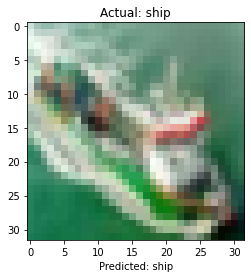

In [77]:
i = 15

actual_label = labels[np.argmax(testY[i])]
predicted_label = labels[np.argmax(predictions[i])]

plt.imshow(testX[i])
plt.title("Actual: {}".format(actual_label))
plt.xlabel("Predicted: {}".format(predicted_label))
plt.show()